In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
# calender.csv: 製品が販売された価格に関する情報
# sales_train_validation.csv:[d1- d1913]までの日付ごとの店および商品の日毎の販売データ

# sample_submittions.csv:提出方法の正しい形式
# sell_price.csv: ストアと日毎に販売された商品の価格に関する情報

In [3]:
ls

Kernel_practice.ipynb       sales_train_validation.csv
Untitled.ipynb              sample_submission.csv
calendar.csv                sell_prices.csv


In [5]:
ss = pd.read_csv("sample_submission.csv")

In [6]:
# 28日間の商品の売り上げ予想
ss.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# d_1 からd_1913までの日付データが商品ごとにある。
# それぞれ、アイテムIDや部門ID、カテゴリID、店IDなどの種類がある。
stv = pd.read_csv("sales_train_validation.csv")
stv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


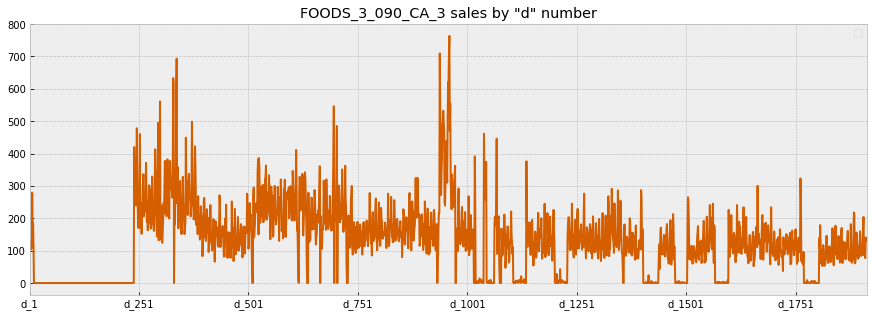

In [25]:
# 日付列の名前を取得
d_cols = [c for c in stv.columns if "d_" in c]

# idが'FOODS_3_090_CA_3_validation'の行を取得
# set_indexでidをindexに
# d_colsで日付列のみを取得
# 行列を入れ替え、数値を縦軸、横軸を時間でプロット
stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='FOODS_3_090_CA_3 sales by "d" number',
          color=next(color_cycle))
plt.legend('')
plt.show()

In [26]:
cal = pd.read_csv("calendar.csv")

In [28]:
cal[['d','date','event_name_1','event_name_2',
     'event_type_1','event_type_2', 'snap_CA']].head()

,d,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
0,d_1,2011-01-29,NaN,NaN,NaN,NaN,0
1,d_2,2011-01-30,NaN,NaN,NaN,NaN,0
2,d_3,2011-01-31,NaN,NaN,NaN,NaN,0
3,d_4,2011-02-01,NaN,NaN,NaN,NaN,1
4,d_5,2011-02-02,NaN,NaN,NaN,NaN,1


In [53]:
#id'が'FOODS_3_090_CA_3_validation'のものを日付列にし転置した結果を取得
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T

# カラム名が8412なのでそれを'FOODS_3_090_CA_3'に変更
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) 

# インデックス名をリセットし、カラム名をindexからdに変更する
example = example.reset_index().rename(columns={'index': 'd'}) 

example

,d,FOODS_3_090_CA_3
0,d_1,108
1,d_2,132
2,d_3,102
3,d_4,120
4,d_5,106
...,...,...
1908,d_1909,88
1909,d_1910,77
1910,d_1911,141
1911,d_1912,139


In [54]:
# 単一商品の日付列dとカレンダー列のdを左を基準とした1対１(validate='1:1')の内部結合
example = example.merge(cal, how='left',  on='d', validate='1:1')
example

,d,FOODS_3_090_CA_3,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,108,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,132,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,102,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,120,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,106,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,d_1909,88,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,d_1910,77,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,d_1911,141,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,d_1912,139,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


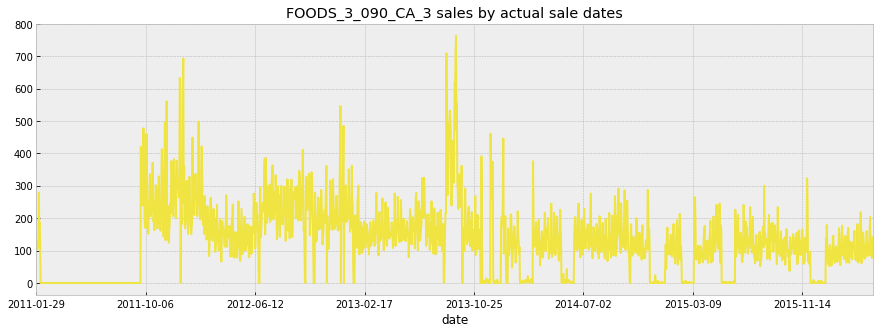

In [55]:
# dateをindexにし、'FOODS_3_090_CA_3'列名のみを選択
# 横軸を日付、縦軸をFOODS_3_090_CA_3の個数でグラフ化
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

In [56]:
# id が'HOBBIES_1_234_CA_3_validation'のものを日付ごとに取得して転置
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'})
example2 = example2.reset_index().rename(columns={'index': 'd'})
example2 = example2.merge(cal, how='left', validate='1:1')

# idが'HOUSEHOLD_1_118_CA_3_validation'のものを日付ごとに取得して転置
example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) 
example3 = example3.reset_index().rename(columns={'index': 'd'})
example3 = example3.merge(cal, how='left', validate='1:1')

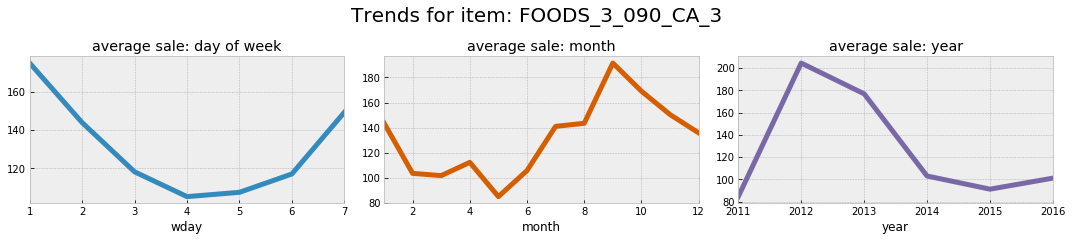

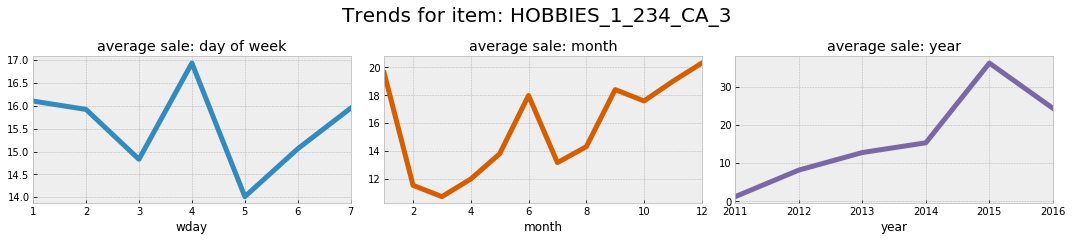

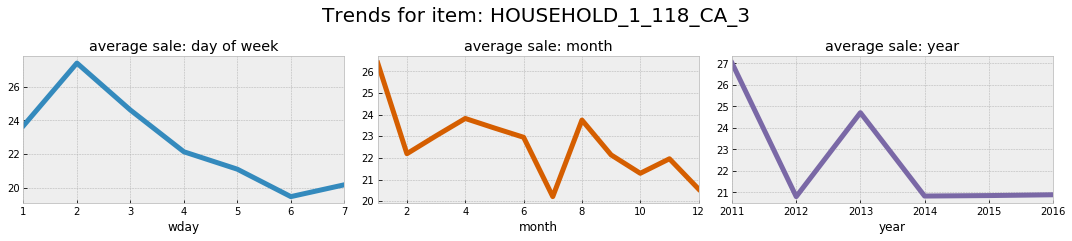

In [57]:
# exampleのカラム名の配列
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']

# dfをまとめたexample_df配列
example_df = [example, example2, example3]

# 3回ループを回す
for i in [0, 1, 2]:
    # ax1, ax2, ax3の3つのサイズ15,3のプロットを1行3列で配置
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    
    # example_dfないにあるi番目のdfを取得し、wdayを元にし、平均groupby
    # examples[i]の列を取得しax1でグラフ化
    # wdayは、曜日を表している
    # lw は、線の太さ
    # kindは、グラフの種類
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    
    # 手順は上記と同様
    # 月ごとにax2でグラフ化している
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],
              ax=ax2)
    
    # 手順は上記と同様
    # 年ごとにax3でグラフ化している
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],
              ax=ax3)
    
    # 表のタイトル
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    
    # plt.tight_layout()で重なりをなくしている
    plt.tight_layout()
    plt.show()

In [58]:
# グラフより
## 日付のみ
# 基本的に曜日1の時に売り上げが高く時間が立つと減少傾向にある.また、7の時には少しばかり上昇傾向がある
# 一方、HOBBIES_1_234_CA_3の場合には、4で落ち込まず増える傾向がある。

## 月のみ
# 月が2の時に落ち込む傾向あり
# 6,7 の月は比較的高くなる

## 年のみ
# 一貫した法則はないが、年ごとに上昇、減少がみられる
# イベントや年ごとのニーズが影響している？

## まとめ
# 曜日1,4,7に何かしらの要因がありそう
# 月6,7も全体と比べると比較的高いので何かしら要因がありそう
# 年ごとのニーズ、イベントの違いがありそう

In [65]:
# sample関数で20個をランダムに取得
# idをindexにし、転置させる
# left_index=True,right_index=Trueでデータフレーム同士をそのまま結合
twenty_examples = stv.sample(20, random_state=529) \
        .set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')
twenty_examples

,FOODS_1_013_TX_1_validation,HOUSEHOLD_1_311_WI_1_validation,FOODS_3_805_CA_3_validation,HOUSEHOLD_2_369_TX_2_validation,HOUSEHOLD_1_080_TX_2_validation,HOUSEHOLD_1_463_CA_2_validation,FOODS_2_046_CA_1_validation,HOUSEHOLD_2_102_WI_3_validation,FOODS_2_131_TX_2_validation,HOUSEHOLD_2_115_WI_1_validation,HOUSEHOLD_1_192_CA_3_validation,FOODS_3_641_CA_1_validation,FOODS_2_110_WI_2_validation,HOUSEHOLD_2_060_TX_2_validation,FOODS_3_018_CA_3_validation,FOODS_1_137_WI_2_validation,FOODS_3_667_CA_2_validation,FOODS_2_162_WI_1_validation,HOBBIES_2_142_TX_2_validation,FOODS_1_053_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,1,0
2011-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0
2011-01-31,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,6,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,5,0
2011-02-02,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,0,1,0,0,3,0,0,1,6,2,1,1,2,0,2,0,0,1,0,2
2016-04-21,2,0,1,0,4,0,0,0,1,2,0,0,1,1,3,4,0,1,0,0
2016-04-22,1,0,0,0,3,0,0,1,3,1,0,4,0,0,0,3,0,4,0,0


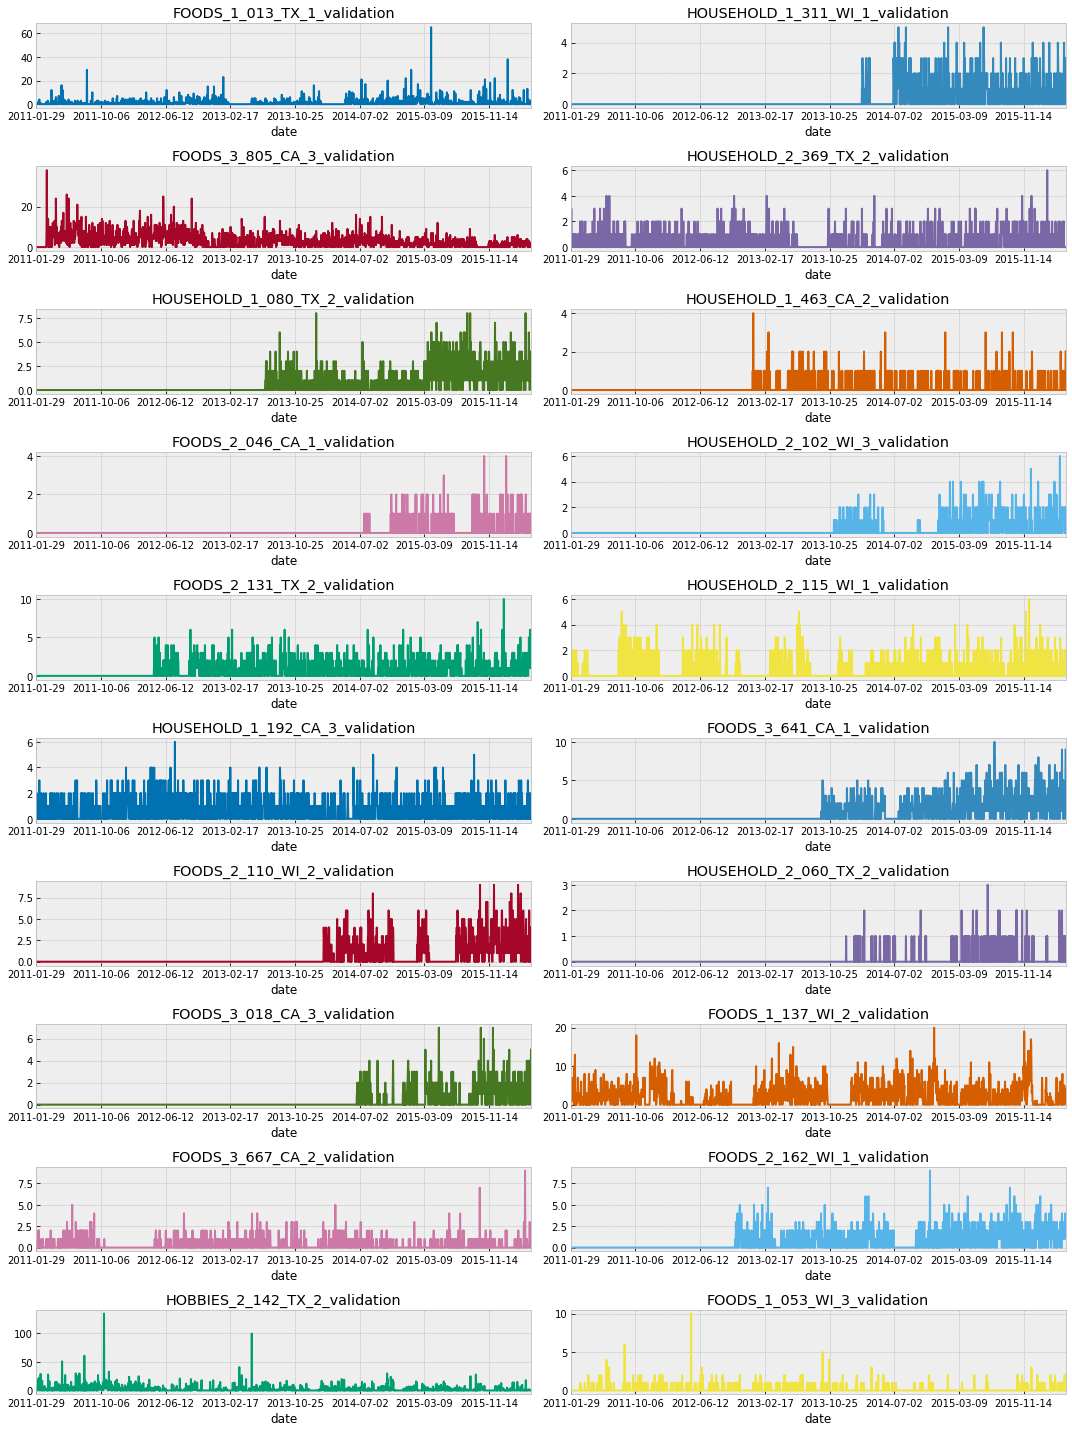

In [60]:
# axs0 番目から20 までに代入してグラフ化
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [66]:
## 考察

# 商品が一定期間ない時がある
# 商品によっては、1日に一個売れるか売れないかのものがあり、予測が難しい
# 一部の日付の時に需要が増加するものもある(スーパーボウルの影響？日曜日)
# 商品が継続的に伸びるということはない

In [67]:
# カテゴリIDの種類
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

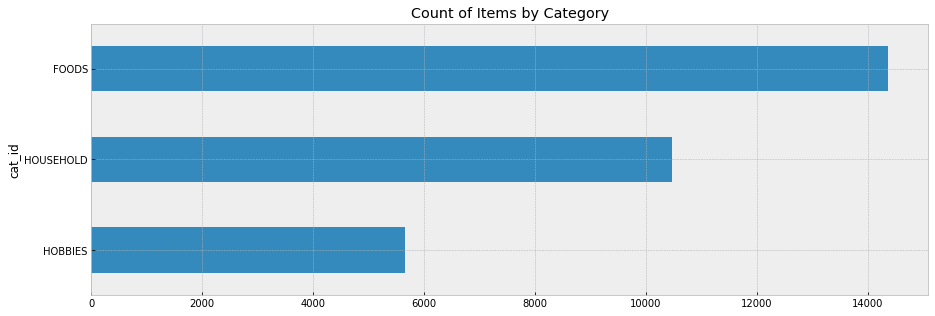

In [68]:
stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

In [70]:
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

past_sales

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,...,FOODS_3_803_WI_3_validation,FOODS_3_804_WI_3_validation,FOODS_3_805_WI_3_validation,FOODS_3_806_WI_3_validation,FOODS_3_807_WI_3_validation,FOODS_3_808_WI_3_validation,FOODS_3_809_WI_3_validation,FOODS_3_810_WI_3_validation,FOODS_3_811_WI_3_validation,FOODS_3_812_WI_3_validation,FOODS_3_813_WI_3_validation,FOODS_3_814_WI_3_validation,FOODS_3_815_WI_3_validation,FOODS_3_816_WI_3_validation,FOODS_3_817_WI_3_validation,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,...,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,...,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,...,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,...,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,...,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,1,1,1,0,1,0,1,4,0,0,0,0,0,0,0,4,0,0,0,0,0,1,1,0,0,...,0,14,3,0,0,0,0,0,27,0,2,1,0,1,0,4,1,1,0,0,0,0,1,1,0
2016-04-21,3,0,0,1,2,0,0,6,0,0,0,1,0,0,0,0,0,0,11,0,0,1,1,0,2,...,0,6,0,0,1,0,2,2,29,1,0,1,0,0,0,2,3,3,0,2,1,0,0,0,0
2016-04-22,0,0,1,3,2,2,0,3,0,2,0,0,0,3,2,15,2,0,4,0,0,0,0,2,2,...,0,0,0,0,0,0,6,1,24,0,0,1,0,0,0,0,1,6,0,3,0,0,0,3,0


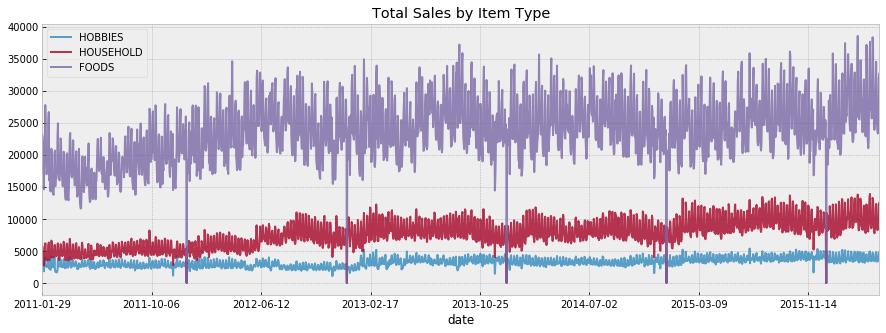

In [71]:
for i in stv['cat_id'].unique():
    # カラム名に指定のカテゴリidが入るものを取得
    items_col = [c for c in past_sales.columns if i in c]
    
    # 取得したカラム配列を指定しデータフレームを取得
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()

In [78]:
## 考察
# 生活必需品のfoodが多め

In [72]:
## 一個売れているか売れていないかグラフ化

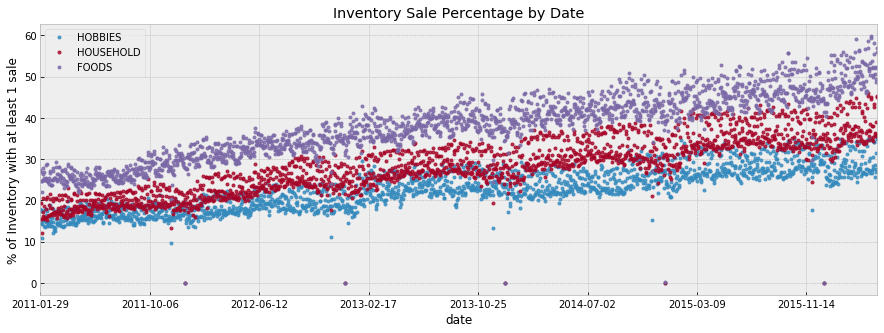

In [75]:
# clip関数により閾値を設定0~1の値のみを取得
past_sales_clipped = past_sales.clip(0, 1)

# カテゴリIDでループを回す
for i in stv['cat_id'].unique():
    # カテゴリに一致するものを取得
    items_col = [c for c in past_sales.columns if i in c]
    (past_sales_clipped[items_col] \
        .mean(axis=1) * 100) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Inventory Sale Percentage by Date',
              style='.')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(stv['cat_id'].unique())
plt.show()

In [79]:
## 店舗別の総売上

In [81]:
sellp = pd.read_csv("sell_prices.csv")

In [82]:
sellp.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


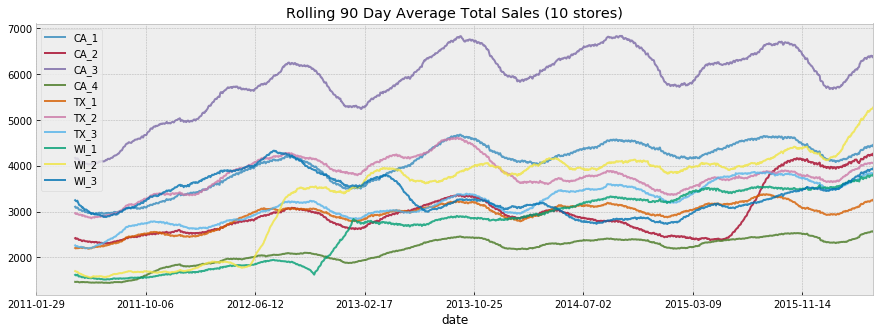

In [85]:
# stroreのリストを取得
store_list = sellp['store_id'].unique()

# 店ごとのグラフ化
for s in store_list:
    # カラム名に店名が入っているものをリストにして取得
    store_items = [c for c in past_sales.columns if s in c]
    
    # 3ヶ月間の移動平均(rolling(90).mean())
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

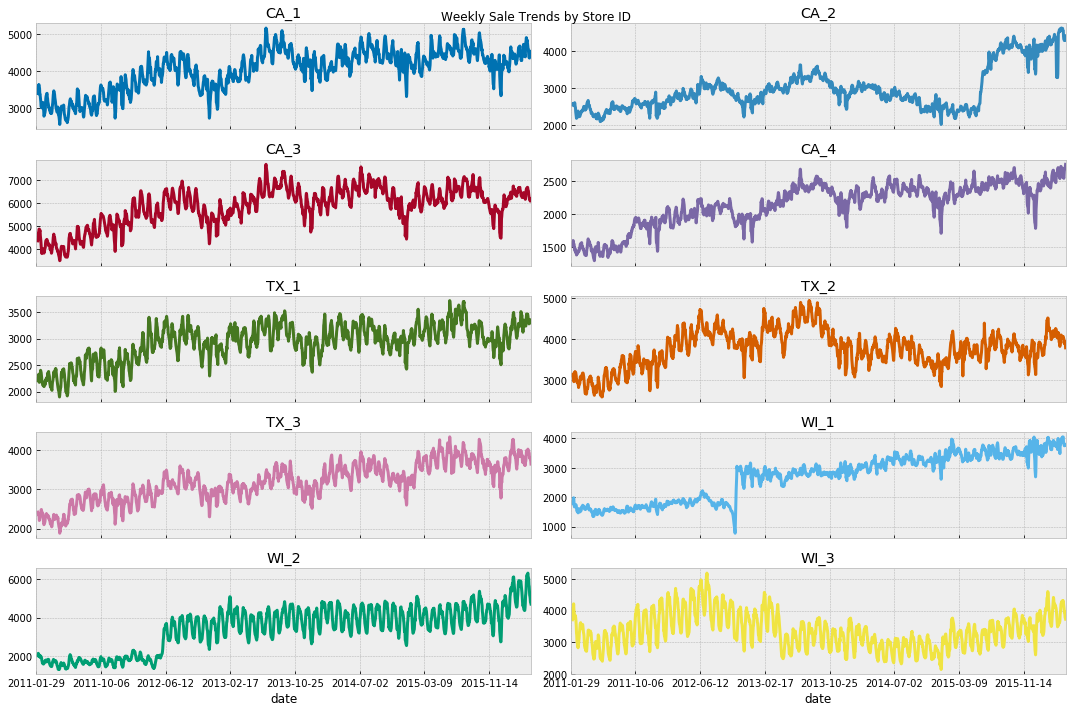

In [86]:
# 5行2列のfigureを作成
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)

# flattenで何番目の要素にグラフを入れるか指定
axes = axes.flatten()

# 要素数をカウント
ax_idx = 0
for s in store_list:
    # 店舗ごとのカラムを取得
    store_items = [c for c in past_sales.columns if s in c]
    
    # 7日間の移動平均をグラフ化
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(7).mean() \
        .plot(alpha=1,
              ax=axes[ax_idx],
              title=s,
              lw=3,
              color=next(color_cycle))
    
    ax_idx += 1
# plt.legend(store_list)
plt.suptitle('Weekly Sale Trends by Store ID')
plt.tight_layout()
plt.show()

In [87]:
## 考察
# 店舗によっては、上昇傾向にあるものがある。店舗を拡大したのか？イベントなどで集客がうまくいっているのか？
# 日が経つにつれ、減少する傾向がある店舗もあり、ライバル店が近くにできた可能性もある

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)

In [89]:
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values().index[0],
     'with', past_sales.sum(axis=1).sort_values().values[0], 'sales')
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', past_sales.sum(axis=1).sort_values(ascending=False).values[0], 'sales')

The lowest sale date was: 2012-12-25 with 11 sales
The lowest sale date was: 2016-03-06 with 57218 sales


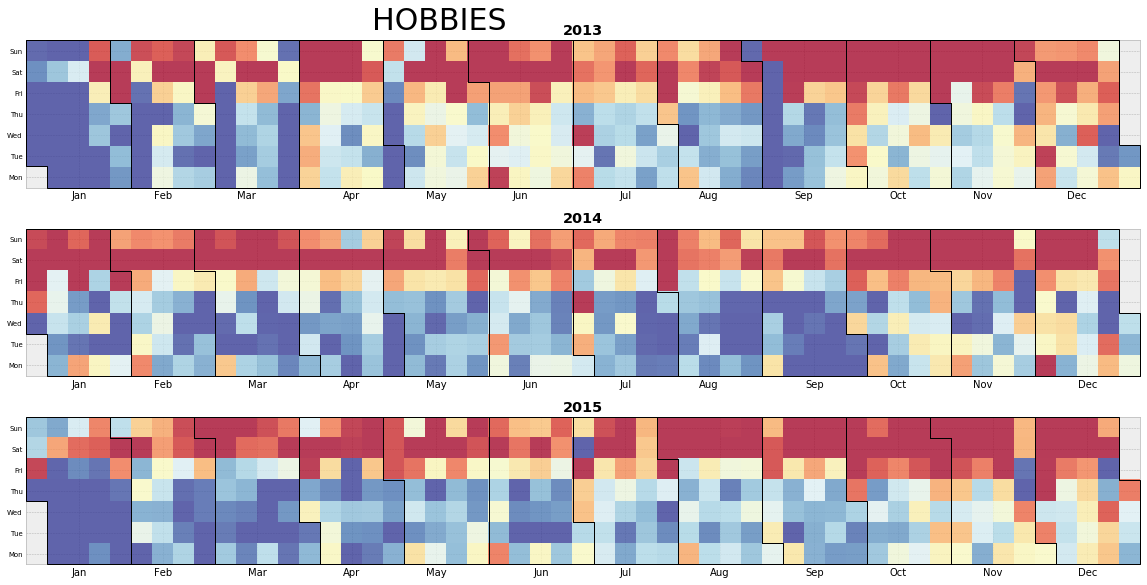

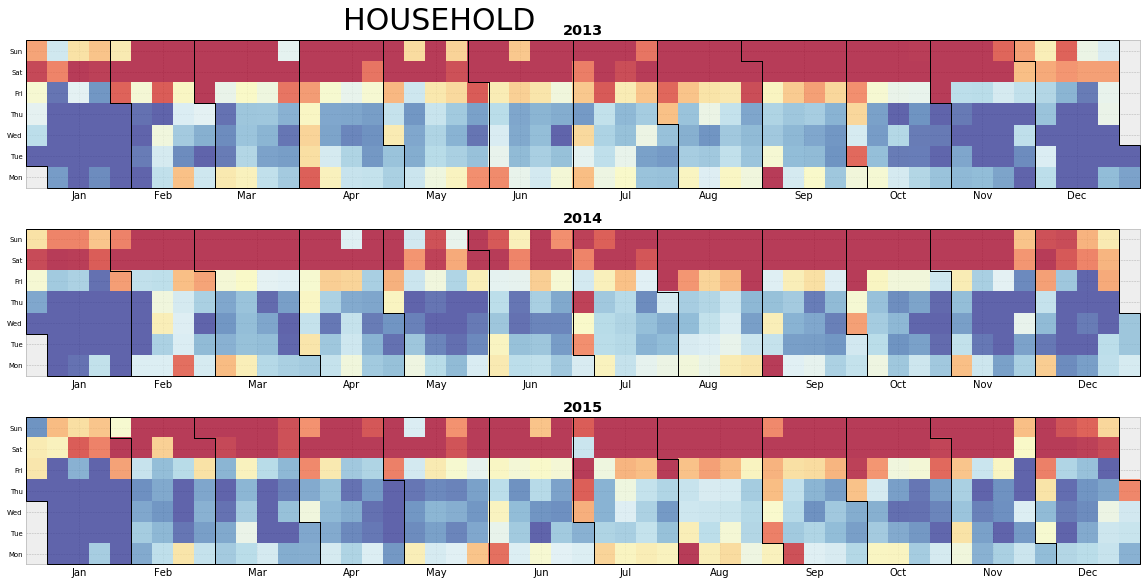

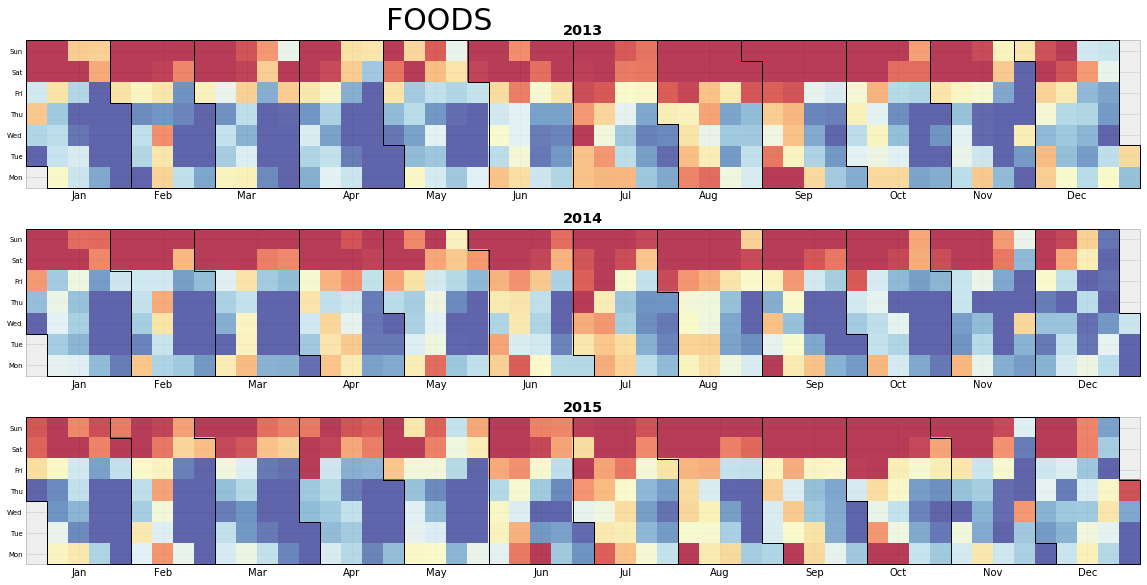

In [93]:
from sklearn.preprocessing import StandardScaler

# StandardScaler()は、標準化を行ってくれる
sscale = StandardScaler()

# 日付をタイムスタンプ化
past_sales.index = pd.to_datetime(past_sales.index)

# カテゴリごとにループ
for i in stv['cat_id'].unique():
    # 3行1列のfigureを作成
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    
    # カテゴリに一致するカラム名を日付ごとのデータから取得
    items_col = [c for c in past_sales.columns if i in c]
    
    # 2012年12月31日から371日分の期間がindexに含まれる(isin)列を選択しそれぞれの行ごとに平均を取得
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    
    # hstackは、配列を行ごとに連結させている
    # fit_transformは、fitとtransformを同時に行っている。fit:値の分散、平均を求めている。　transformは、値の標準化
    # df.valuesで値をnumpy 配列で取得
    # reshape(-1, 1)で二次元の縦ベクトルに変換している
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    
    # calmap(位置の指定, タイトル, 値)でヒートマップを作成
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    
    #2014年のデータを上記と同様に取得
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    
    # 2015年のデータを上記と同様に取得
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    
    # タイトル
    plt.suptitle(i, fontsize=30, x=0.4, y=1.01)
    
    # 重複しないように配置
    plt.tight_layout()
    plt.show()

In [94]:
## 考察
# 週末(土日)は、月によらず多くの人が買う
# 月終わりには、売り上げが減る傾向がある
# ホリデーシーズンが終わった、1月に家庭用品と趣味商品が売れる
# 月曜日は、売り上げが低くなる

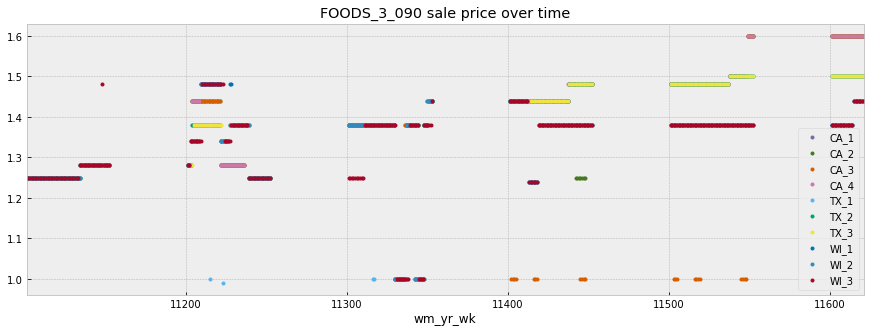

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
# query メソッドで指定の行を値を取得する
for store, d in sellp.query('item_id == "FOODS_3_090"').groupby('store_id'):
    d.plot(x='wm_yr_wk',
          y='sell_price',
          style='.',
          color=next(color_cycle),
          figsize=(15, 5),
          title='FOODS_3_090 sale price over time',
         ax=ax,
          legend=store)
    stores.append(store)
    plt.legend()
plt.legend(stores)
plt.show()

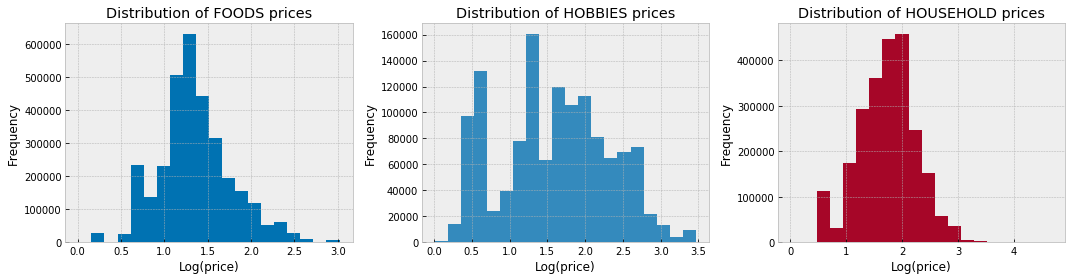

In [96]:
sellp['Category'] = sellp['item_id'].str.split('_', expand=True)[0]
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
i = 0
for cat, d in sellp.groupby('Category'):
    ax = d['sell_price'].apply(np.log1p) \
        .plot(kind='hist',
                         bins=20,
                         title=f'Distribution of {cat} prices',
                         ax=axs[i],
                                         color=next(color_cycle))
    ax.set_xlabel('Log(price)')
    i += 1
plt.tight_layout()

In [101]:
# 提出用データフレームの作成
thirty_day_avg_map = stv.set_index('id')[d_cols[-30:]].mean(axis=1).to_dict()
print(thirty_day_avg_map)

{'HOBBIES_1_001_CA_1_validation': 0.9666666666666667, 'HOBBIES_1_002_CA_1_validation': 0.13333333333333333, 'HOBBIES_1_003_CA_1_validation': 0.5666666666666667, 'HOBBIES_1_004_CA_1_validation': 2.1, 'HOBBIES_1_005_CA_1_validation': 1.2666666666666666, 'HOBBIES_1_006_CA_1_validation': 0.6666666666666666, 'HOBBIES_1_007_CA_1_validation': 0.36666666666666664, 'HOBBIES_1_008_CA_1_validation': 7.6, 'HOBBIES_1_009_CA_1_validation': 0.8333333333333334, 'HOBBIES_1_010_CA_1_validation': 0.6333333333333333, 'HOBBIES_1_011_CA_1_validation': 0.03333333333333333, 'HOBBIES_1_012_CA_1_validation': 0.2, 'HOBBIES_1_013_CA_1_validation': 0.4666666666666667, 'HOBBIES_1_014_CA_1_validation': 1.5333333333333334, 'HOBBIES_1_015_CA_1_validation': 2.7666666666666666, 'HOBBIES_1_016_CA_1_validation': 6.366666666666666, 'HOBBIES_1_017_CA_1_validation': 1.3333333333333333, 'HOBBIES_1_018_CA_1_validation': 0.0, 'HOBBIES_1_019_CA_1_validation': 9.533333333333333, 'HOBBIES_1_020_CA_1_validation': 0.2, 'HOBBIES_1_02

In [112]:
fcols = [f for f in ss.columns if 'F' in f]
for f in fcols:
    # 月の平均をキーが一致するものに代入
    ss[f] = ss['id'].map(thirty_day_avg_map).fillna(0)
    
ss.to_csv('submission.csv', index=False)

In [100]:
ss

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
1,HOBBIES_1_002_CA_1_validation,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333
2,HOBBIES_1_003_CA_1_validation,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667
3,HOBBIES_1_004_CA_1_validation,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000
4,HOBBIES_1_005_CA_1_validation,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60976,FOODS_3_824_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60977,FOODS_3_825_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60978,FOODS_3_826_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
